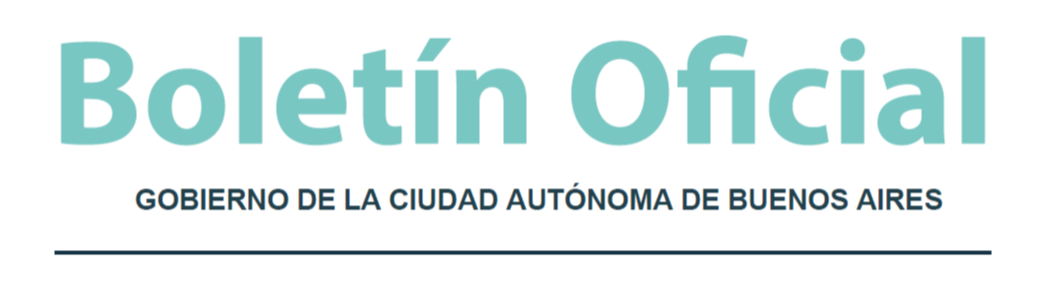

# 📄 Búsqueda de Términos Clave en el Boletín Oficial de la Ciudad de Buenos Aires
Este notebook permite analizar un archivo PDF del Boletín Oficial de la Ciudad de Buenos Aires, buscando un conjunto de términos clave relacionados con el ejercicio profesional de la arquitectura y el urbanismo.

### 👇 Instrucciones:
1. Ejecutá cada celda con **Shift + Enter**.
2. Subí el archivo PDF del Boletín Oficial cuando se indique.
3. El sistema mostrará los términos encontrados, con la página y un fragmento de contexto.

In [ ]:
# 📦 Instalación de dependencias
!pip install pdfplumber openpyxl
!pip install tqdm

import logging
logging.getLogger("pdfminer").setLevel(logging.ERROR)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.4 MB/s eta 0:00:00


In [ ]:
# 📁 Subida del archivo PDF
from google.colab import files
uploaded = files.upload()

Saving 20250513.pdf to 20250513.pdf


###Como construir expresiones regulares

| Tipo            | Plantilla general (personalizable)                                                   |
| --------------- | ------------------------------------------------------------------------------------ |
| **Disposición** | `r"[Dd]isposici[oó]n(?: [Nn]°?)? ?<NRO>(?:[-/]?GCABA)?[-/]?<REPARTICION>[-/]?<AÑO>"` |
| **Resolución**  | `r"[Rr]esoluci[oó]n(?: [Nn]°?)? ?<NRO>(?:[-/]?GCABA)?[-/]?<REPARTICION>[-/]?<AÑO>"`  |
| **Decreto**     | `r"[Dd]ecreto(?: [Nn]°?)? ?<NRO>/<AÑO>"`                                             |
| **Ley**         | `r"[Ll]ey(?: [Nn]°?)? ?<NUMERO>"` (con o sin punto en miles)                         |

🔁 Reemplazar los campos <NRO.>, <REPARTICIÓN> y <AÑO> por los valores que necesites.

In [ ]:
# 🧠 Lista de términos clave
keywords = [
    "Código Urbanístico",
    "Código de Edificación",
    "Código de Habilitaciones",
    "Reglamentos Técnicos",
    "Reglamento Técnico",
    "Autorización de actividades económicas",
    "Autorizaciones de actividades económicas",
    "Impacto ambiental",
    "Ley Tarifaria",
    "Unidad Tarifaria",
    "Sistema de Autoprotección",
    "Sistemas de Autoprotección",
    "Catastro",
    "Derecho para el Desarrollo Urbano y el Hábitat Sustentable",
    "Código Fiscal",
    "Área Céntrica",
    r"[Dd]isposici[oó]n(?: [Nn]°?)? ?331(?:[-/]?GCABA)?[-/]?DGDCIV[-/]?25",
    r"[Dd]isposici[oó]n(?: [Nn]°?)? ?89(?:[-/]?GCABA)?[-/]?DGROC[-/]?24",
    r"[Dd]isposici[oó]n(?: [Nn]°?)? ?526(?:[-/]?GCABA)?[-/]?DGFYCO[-/]?24",
    r"[Rr]esoluci[oó]n(?: [Nn]°?)? ?275(?:[-/]?GCABA)?[-/]?APRA[-/]?23",
    r"[Rr]esoluci[oó]n(?: [Nn]°?)? ?188(?:[-/]?GCABA)?[-/]?SSGU[-/]?24",
    r"[Rr]esoluci[oó]n(?: [Nn]°?)? ?160(?:[-/]?GCABA)?[-/]?SSHA[-/]?24",
    r"[Rr]esoluci[oó]n(?: [Nn]°?)? ?96(?:[-/]?GCABA)?[-/]?AGC[-/]?25",
    r"[Rr]esoluci[oó]n(?: [Nn]°?)? ?345(?:[-/]?GCABA)?[-/]?AGC[-/]?21",
    r"[Rr]esoluci[oó]n(?: [Nn]°?)? ?103(?:[-/]?GCABA)?[-/]?APRA[-/]?25",
    r"[Dd]ecreto(?: [Nn]°?)? ?51/18",
    r"[Dd]ecreto(?: [Nn]°?)? ?86/19",
    r"[Dd]ecreto(?: [Nn]°?)? ?87/19",
    r"[Dd]ecreto(?: [Nn]°?)? ?99/19",
    r"[Dd]ecreto(?: [Nn]°?)? ?105/19",
    r"[Dd]ecreto(?: [Nn]°?)? ?475/20",
    r"[Dd]ecreto(?: [Nn]°?)? ?129/25",
    r"[Dd]ecreto(?: [Nn]°?)? ?116/25",
    r"[Dd]ecreto(?: [Nn]°?)? ?164/25",
    r"[Ll]ey(?: [Nn]°?)? ?123",
    r"[Ll]ey(?: [Nn]°?)? ?5920",
    r"[Ll]ey(?: [Nn]°?)? ?6101",
    r"[Ll]ey(?: [Nn]°?)? ?6776",
    r"[Ll]ey(?: [Nn]°?)? ?6779",
    r"[Ll]ey(?: [Nn]°?)? ?6099",
    r"[Ll]ey(?: [Nn]°?)? ?6100",
    r"[Ll]ey(?: [Nn]°?)? ?6438",
    r"[Ll]ey(?: [Nn]°?)? ?6806",
    r"[Ll]ey(?: [Nn]°?)? ?6508"
  ]

In [ ]:
# 🔍 Búsqueda de términos clave y exportación a Excel

import pdfplumber
import re
import pandas as pd
import io
from tqdm.notebook import tqdm

resultados = []

# Detectar el archivo PDF
pdf_file = next((f for f in uploaded if f.endswith('.pdf')), None)

with pdfplumber.open(io.BytesIO(uploaded[pdf_file])) as pdf:
    for i, page in enumerate(tqdm(pdf.pages, desc="Procesando páginas")):
        text = page.extract_text()
        if text:
            for term in keywords:
                matches = list(re.finditer(term, text, re.IGNORECASE))
                for m in matches:
                    start = max(m.start() - 150, 0)
                    end = m.end() + 150
                    context = text[start:end].replace('\n', ' ')
                    resultados.append({
                        "Página": i + 1,
                        "Término": term,
                        "Contexto": context
                    })

# Exportar a archivo Excel
df_resultados = pd.DataFrame(resultados)
nombre_salida = "resultados_busqueda_BOCABA.xlsx"
df_resultados.to_excel(nombre_salida, index=False)

# Descargar archivo
from google.colab import files
files.download(nombre_salida)


Procesando páginas:   0%|          | 0/519 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>